# Particle Swarm Intelligence

In [1]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
import copy

### Define the Problem

In [2]:
def f(x):
    # x is a numpy array
    return sum(x**2)

#### Define the hyperparameters

In [3]:
costfunction = f

particle_dimension = 10
bound_up = 5
bound_low = -5
domain = bound_up - bound_low

vel_max = domain / 10
vel_min = -vel_max

swarm_size = 100
n_iterations = 200

In [4]:
# constriction factor
phi1 = 2.05
phi2 = 2.05

phi = phi1 + phi2
chi = 2 / (phi - 2 + (phi**2 - 4*phi)**0.5)

w = chi            # inertia weight
c1 = phi1 * chi    # cognitive constant
c2 = phi2 * chi    # social constant

#### Initilization

In [5]:
class Particle:
    # initilizer
    def __init__(self):
        self.position = uniform(bound_low,
                               bound_up,
                               particle_dimension)
        self.velocity = uniform(vel_min,
                               vel_max,
                               particle_dimension)
        self.p_best_position = copy.deepcopy(self.position)
        self.p_best_cost = self.cost
    
    @property
    def cost(self):
        return costfunction(self.position)

    def update(self):
        ## Xnew = Xold + Vnew
        ## Vnew = w*Vold + 
        ##        c1*r1*(pbest-Xold) +
        ##        c2*r2*(gbest-Xold)
        
        r1 = uniform(0,1,particle_dimension)
        r2 = uniform(0,1,particle_dimension)
        
        # personal and global learning coefficients
        p_co = c1 * r1
        g_co = c2 * r2
        
        # update the new velocity
        self.velocity = w * self.velocity \
                        + p_co * (self.p_best_position - self.position) \
                        + g_co * (g_best_position - self.position)
        
        # check the velocity components bounds
        for i in range(particle_dimension):
            if self.velocity[i] > vel_max:
                self.velocity[i] = vel_max
            if self.velocity[i] < vel_min:
                self.velocity[i] = vel_min
        
        # update position
        self.position += self.velocity
        
        # velocity mirroring 
        for i in range(particle_dimension):
            if self.position[i] > bound_up:
                self.position[i] = bound_up
                self.velocity[i] *= -1
            if self.position[i] < bound_low:
                self.position[i] = bound_low
                self.velocity[i] *= -1
        
        # check for personal best record
        if self.cost < self.p_best_cost:
            self.p_best_position = copy.deepcopy(self.position)
            self.p_best_cost = self.cost
            

#### Define the swarm population

In [6]:
particles = [Particle() for _ in range(swarm_size)]

def global_best():
    g_best = copy.deepcopy(sorted(particles,
              key = lambda t:t.p_best_cost)[0])
    global g_best_cost, g_best_position
    g_best_cost = g_best.p_best_cost
    g_best_position = g_best.position

global_best()

In [7]:
# an empty list to record the best solution
best_positions = [g_best_position]
best_costs = [g_best_cost]

#### Define the main loop

In [8]:
for it in range(n_iterations):
    for i in particles:
        i.update()
    
    global_best()
    
    best_positions.append(g_best_position)
    best_costs.append(g_best_cost)
    
    # print information
    print (f"loop : {it} \nglobal_best_cost: {best_costs[-1]} \nglobal_best_position: {best_positions[-1]} \n{'-'*30}")

loop : 0 
global_best_cost: 20.919221634845723 
global_best_position: [-0.02680894  0.12950978 -0.23380376 -2.1191855  -0.96366082 -2.10974797
 -3.13266784  0.82337382 -0.55790031 -0.41669544] 
------------------------------
loop : 1 
global_best_cost: 9.463763806900003 
global_best_position: [ 1.78301237 -0.34966187  1.34255962 -0.34030757 -1.19855667  0.54954953
  0.80059793  0.69056835  0.61526816  1.00456574] 
------------------------------
loop : 2 
global_best_cost: 4.01872558465785 
global_best_position: [ 1.05316858  0.38018192  0.61271583 -1.07015136 -0.56601928 -0.18029426
  0.07075415  0.89324627 -0.11457563  0.27472195] 
------------------------------
loop : 3 
global_best_cost: 1.7121636794705564 
global_best_position: [ 0.52647864  0.17678911 -0.03534622 -0.61538465 -0.07219366 -0.56958974
  0.10306827  0.66377053  0.46750265  0.15609098] 
------------------------------
loop : 4 
global_best_cost: 1.7121636794705564 
global_best_position: [ 0.14057687  0.00221419 -0.76519

------------------------------
loop : 38 
global_best_cost: 0.02798174641893712 
global_best_position: [ 0.04801546  0.12050142 -0.0018571  -0.02119224  0.06824841  0.03371012
 -0.00249722  0.00804791  0.01220094 -0.06847645] 
------------------------------
loop : 39 
global_best_cost: 0.02798174641893712 
global_best_position: [-0.03179061  0.05409643  0.3049597   0.01693603 -0.08417409  0.04795695
  0.02330002 -0.0083939   0.0293175  -0.24977195] 
------------------------------
loop : 40 
global_best_cost: 0.02798174641893712 
global_best_position: [ 0.01304524  0.03958381  0.15886898  0.04299903 -0.07621964  0.05624121
  0.0129959  -0.01379361  0.02243609 -0.25582244] 
------------------------------
loop : 41 
global_best_cost: 0.02798174641893712 
global_best_position: [ 0.07816317  0.03335852 -0.03108278 -0.01183611  0.07330777  0.04778573
 -0.00719131  0.01286565  0.01317239 -0.21681272] 
------------------------------
loop : 42 
global_best_cost: 0.02798174641893712 
global_best

loop : 77 
global_best_cost: 0.0026530075603346578 
global_best_position: [ 0.00759922 -0.02685709  0.01140371 -0.01908599 -0.03271162  0.02688048
  0.02490327 -0.00247084 -0.00940553 -0.01907165] 
------------------------------
loop : 78 
global_best_cost: 0.0026530075603346578 
global_best_position: [ 0.00764186 -0.0265377   0.01180831 -0.01908804 -0.05715067  0.02798745
  0.02428547 -0.00510047 -0.00925853 -0.02609425] 
------------------------------
loop : 79 
global_best_cost: 0.0026530075603346578 
global_best_position: [ 0.00765582 -0.02626636  0.01484225 -0.01909275 -0.01293504  0.0274586
  0.02322207 -0.00487545 -0.01119615  0.00377955] 
------------------------------
loop : 80 
global_best_cost: 0.0026530075603346578 
global_best_position: [ 0.00765404 -0.02607536  0.01783542 -0.01910097  0.03761892  0.02105875
  0.02287323  0.00243092 -0.01233452  0.03113735] 
------------------------------
loop : 81 
global_best_cost: 0.0026530075603346578 
global_best_position: [ 0.0076228

loop : 119 
global_best_cost: 0.0007120972915827684 
global_best_position: [ 0.00929582  0.01949409  0.00213303 -0.00884798 -0.00262493 -0.00933753
 -0.00712418 -0.018398    0.01080374 -0.00484912] 
------------------------------
loop : 120 
global_best_cost: 0.0007120972915827684 
global_best_position: [ 0.00724329 -0.01581702  0.00144163 -0.01149607  0.01106879 -0.01057808
  0.01166842 -0.01242846  0.01252694 -0.00503857] 
------------------------------
loop : 121 
global_best_cost: 0.0007120972915827684 
global_best_position: [ 0.0066456  -0.01003312  0.00094499 -0.01223975  0.02379882 -0.0118804
  0.01580304 -0.00561167  0.00690899 -0.00427337] 
------------------------------
loop : 122 
global_best_cost: 0.0007120972915827684 
global_best_position: [ 0.0076528  -0.00102454  0.00058514 -0.01046789  0.02385041 -0.01221492
  0.00138302 -0.00207657  0.0026621   0.0020336 ] 
------------------------------
loop : 123 
global_best_cost: 0.0007120972915827684 
global_best_position: [ 0.00

loop : 160 
global_best_cost: 6.270172910020679e-05 
global_best_position: [-0.00472069  0.0007042   0.00309831 -0.00010733 -0.00233778  0.00151375
  0.00122323  0.00516636  0.00169619  0.00078573] 
------------------------------
loop : 161 
global_best_cost: 6.270172910020679e-05 
global_best_position: [-0.00365212  0.00048543  0.00230143 -0.00366993 -0.00232578  0.00664069
  0.00122669  0.00534909  0.00033301  0.00072975] 
------------------------------
loop : 162 
global_best_cost: 4.653305522733798e-05 
global_best_position: [-0.00290917 -0.00012162  0.00194082  0.0014266   0.00142088 -0.00444564
  0.00143417 -0.00238327  0.00010232  0.00165019] 
------------------------------
loop : 163 
global_best_cost: 3.0138650002935582e-05 
global_best_position: [-0.00247633  0.00093887 -0.00081132  0.00415681 -0.00036361 -0.00170819
  0.00102361 -0.00089534  0.00046791 -0.00026308] 
------------------------------
loop : 164 
global_best_cost: 3.0138650002935582e-05 
global_best_position: [-0

loop : 193 
global_best_cost: 4.723831535131808e-06 
global_best_position: [ 9.17872039e-03  1.49417332e-04  6.74346039e-04 -1.15342936e-03
  1.34598022e-03  2.55758925e-05  1.78008260e-04 -1.21126305e-04
  1.30886237e-03 -1.60806580e-04] 
------------------------------
loop : 194 
global_best_cost: 4.723831535131808e-06 
global_best_position: [ 2.72165711e-03  8.10344696e-05  6.74037501e-04 -1.16632021e-03
  1.09615426e-03  4.13098367e-05  1.81855554e-04  3.79639902e-06
  1.28751771e-03 -1.52324277e-04] 
------------------------------
loop : 195 
global_best_cost: 4.31331923209416e-06 
global_best_position: [ 7.71868834e-05 -1.84266965e-05  2.49071288e-04 -1.17332287e-03
  7.97185242e-04  4.77910665e-04 -1.73386213e-04  4.02312013e-04
  1.32016119e-03 -2.63917783e-04] 
------------------------------
loop : 196 
global_best_cost: 4.31331923209416e-06 
global_best_position: [-0.00526203  0.00076894  0.00031191 -0.00030845  0.00094363 -0.00061812
 -0.00035828  0.00140756  0.00139209 -0.0

<function matplotlib.pyplot.show(*args, **kw)>

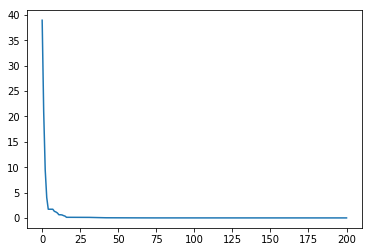

In [9]:
plt.plot(best_costs)
plt.show